In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import multilabel_confusion_matrix

In [2]:
df1 = pd.read_csv("Training.csv")
df2 = pd.read_csv("Testing.csv")
df = pd.concat([df1,df2])

In [3]:
print(df.shape)
df.head()

(4962, 134)


,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis,Unnamed: 133
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN


In [4]:
df.drop('Unnamed: 133', axis=1, inplace=True)
df.columns

Index(['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing',
       'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity',
       'ulcers_on_tongue',
       ...
       'blackheads', 'scurring', 'skin_peeling', 'silver_like_dusting',
       'small_dents_in_nails', 'inflammatory_nails', 'blister',
       'red_sore_around_nose', 'yellow_crust_ooze', 'prognosis'],
      dtype='object', length=133)

In [5]:
df['prognosis'].value_counts()

Fungal infection                           122
Hepatitis C                                121
Hepatitis E                                121
Alcoholic hepatitis                        121
Tuberculosis                               121
Common Cold                                121
Pneumonia                                  121
Dimorphic hemmorhoids(piles)               121
Heart attack                               121
Varicose veins                             121
Hypothyroidism                             121
Hyperthyroidism                            121
Hypoglycemia                               121
Osteoarthristis                            121
Arthritis                                  121
(vertigo) Paroymsal  Positional Vertigo    121
Acne                                       121
Urinary tract infection                    121
Psoriasis                                  121
Hepatitis D                                121
Hepatitis B                                121
Allergy      

In [6]:
x = df.drop('prognosis', axis = 1)
y = df['prognosis']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state =21 )

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [9]:
svm_model_linear = SVC(kernel = 'linear', C = 1).fit(X_train, y_train)
svm_predictions = svm_model_linear.predict(X_test)

# model accuracy 
accuracy = svm_model_linear.score(X_test, y_test)
 
# creating a confusion matrix
cm = multilabel_confusion_matrix(y_test, svm_predictions)
print(str(accuracy*100) +'%')
print(cm[0])

99.91941982272361%
[[1214    0]
 [   0   27]]


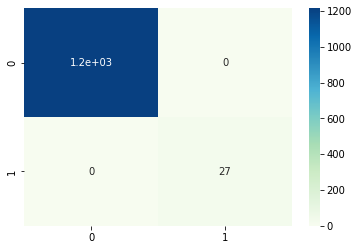

In [10]:
import matplotlib.pyplot as plt
import seaborn as sn
sn.heatmap(cm[0],annot = True, cmap = 'GnBu')
plt.show()